# Analysis of the Max params

In [ ]:
# !llama-stack-client --version

llama-stack-client, version 0.1.7


In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from experiments.tools import GenerateParam, ArbitraryClientTool
from experiments.max_params_per_tool.max_params_per_tool import *

In [3]:
get_params = get_params(50)

Parameter 1: name temperature, type:float, description:The temperature of the environment.
Parameter 2: name humidity, type:int, description:The humidity level of the air.
Parameter 3: name pressure, type:bool, description:Whether the pressure is high or low.
Parameter 4: name altitude, type:str, description:The altitude of the location.
Parameter 5: name speed, type:float, description:The speed of the object.
Parameter 6: name location, type:str, description:The location of the object.
Parameter 7: name time, type:int, description:The time of day.
Parameter 8: name direction, type:str, description:The direction of travel.
Parameter 9: name distance, type:float, description:The distance traveled.
Parameter 10: name speed_limit, type:int, description:The speed limit of the road.
Parameter 11: name fuel_level, type:float, description:The fuel level of the vehicle.
Parameter 12: name fuel_efficiency, type:float, description:The fuel efficiency of the vehicle.
Parameter 13: name engine_siz

In [4]:
print(f"Starting test: {get_params['name']}")

Starting test: ['temperature', 'humidity', 'pressure', 'altitude', 'speed', 'location', 'time', 'direction', 'distance', 'speed_limit', 'fuel_level', 'fuel_efficiency', 'engine_size', 'horsepower', 'torque', 'transmission_type', 'gear_ratio', 'brake_type', 'suspension_type', 'steering_type', 'seat_type', 'airbag_type', 'anti_lock_brake_system', 'electronic_stability_control', 'lane_departure_warning', 'adaptive_cruise_control', 'blind_spot_monitor', 'rear_view_camera', 'parking_sensors', 'keyless_entry', 'push_start_button', 'remote_start', 'smartphone_app', 'voice_command', 'navigation_system', 'automatic_emergency_braking', 'lane_centering', 'traffic_sign_recognition', 'driver_monitoring', 'parking_sonar', '360_degree_camera', 'blind_spot_monitoring']


In [5]:


# To track seen names and their indices
seen_names = set()
indices_to_remove = []

# Iterate over the 'name' list
for i in range(len(get_params['name'])):
    if get_params['name'][i] in seen_names:
        # Mark the index for removal if name is duplicated
        print(f"Duplicate name found: {get_params['name'][i]}")
        indices_to_remove.append(i)
    else:
        # Otherwise, add to the set of seen names
        seen_names.add(get_params['name'][i])

# Remove the entries that have duplicates in 'name'
get_params['name'] = [get_params['name'][i] for i in range(len(get_params['name'])) if i not in indices_to_remove]
get_params['type'] = [get_params['type'][i] for i in range(len(get_params['type'])) if i not in indices_to_remove]
get_params['description'] = [get_params['description'][i] for i in range(len(get_params['description'])) if i not in indices_to_remove]

# Output the cleaned get_params
print("Data cleaned (duplicates removed): \n")
for param in get_params:
    print(param, get_params[param])


Data cleaned (duplicates removed): 

name ['temperature', 'humidity', 'pressure', 'altitude', 'speed', 'location', 'time', 'direction', 'distance', 'speed_limit', 'fuel_level', 'fuel_efficiency', 'engine_size', 'horsepower', 'torque', 'transmission_type', 'gear_ratio', 'brake_type', 'suspension_type', 'steering_type', 'seat_type', 'airbag_type', 'anti_lock_brake_system', 'electronic_stability_control', 'lane_departure_warning', 'adaptive_cruise_control', 'blind_spot_monitor', 'rear_view_camera', 'parking_sensors', 'keyless_entry', 'push_start_button', 'remote_start', 'smartphone_app', 'voice_command', 'navigation_system', 'automatic_emergency_braking', 'lane_centering', 'traffic_sign_recognition', 'driver_monitoring', 'parking_sonar', '360_degree_camera', 'blind_spot_monitoring']
type ['float', 'int', 'bool', 'str', 'float', 'str', 'int', 'str', 'float', 'int', 'float', 'float', 'int', 'int', 'float', 'str', 'float', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str',

In [6]:
print(len(get_params['name']))

42


In [ ]:
import random
retry = False
acc_dict  = {}
for i in range(1, 40):
    error_count = 0
    # Get random indices from the range of the sliced lists
    random_indices = random.sample(range(len(get_params['name'])), i)
    if retry:
        i = i - 1
    # Select the corresponding names, types, and descriptions using the random indices
    selected_params = {
        'name': [get_params['name'][idx] for idx in random_indices],
        'type': [get_params['type'][idx] for idx in random_indices],
        'description': [get_params['description'][idx] for idx in random_indices]
    }
    print(len(selected_params['name']))
    response = test_abitrary_client_tool(selected_params)
    steps = response.steps
    # for step in steps:
    #     print(step)
    try:
        params_used = steps[1].tool_calls[0].arguments

        for param_name, param_value in params_used.items():
            index = selected_params['name'].index(param_name)
            expected_type = selected_params['type'][index]
            
            # Check if the type matches the expected type
            if not isinstance(param_value, eval(expected_type)):
                print(f"Parameter '{param_name}' has an invalid type. Expected '{expected_type}', but got '{type(param_value).__name__}'.")
                error_count += 1
        acc_dict[i] = error_count
        retry = False    
    except:
        print("Error with the tool")
        retry = True
        continue
    print("Parameter checks completed.")

1
Parameters used: 

parking_sonar ultrasonic
Parameter checks completed.
2
Parameters used: 

blind_spot_monitoring radar
rear_view_camera backup camera
Parameter checks completed.
3
Parameters used: 

speed_limit 120.0
gear_ratio 3.5
rear_view_camera backup camera
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
4
Parameters used: 

voice_command text_to_speech
speed 50.0
remote_start key_fob
direction forward
Parameter checks completed.
5
Parameters used: 

fuel_level 0.5
voice_command Siri
automatic_emergency_braking ABS
temperature 25.0
suspension_type MacPherson
Parameter checks completed.
6
Parameters used: 

voice_command Siri
location New York
keyless_entry Biometric
electronic_stability_control ESC
altitude 1000.0
speed 60.0
Parameter 'altitude' has an invalid type. Expected 'str', but got 'float'.
Parameter checks completed.
7
Parameters used: 

engine_size 3.5
seat_type leather
gear_ratio 4.2
direction forward
electro

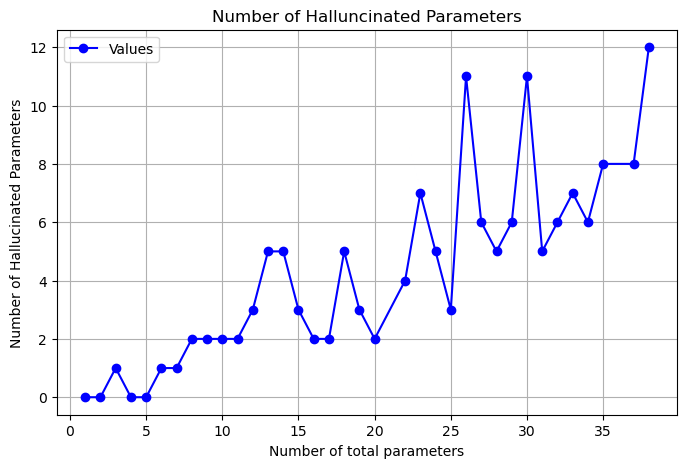

In [20]:
import matplotlib.pyplot as plt

# Example dictionary with numerical keys and values

# Extract keys and values
keys = list(acc_dict.keys())
values = list(acc_dict.values())

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the values
plt.plot(keys, values, marker='o', linestyle='-', color='b', label='Values')

# Label the axes
plt.xlabel('Number of total parameters')
plt.ylabel('Number of Hallucinated Parameters')

# Add a title to the plot
plt.title('Number of Halluncinated Parameters')

# Optionally, add gridlines for better visibility
plt.grid(True)

# Show the plot
plt.legend()
plt.show()


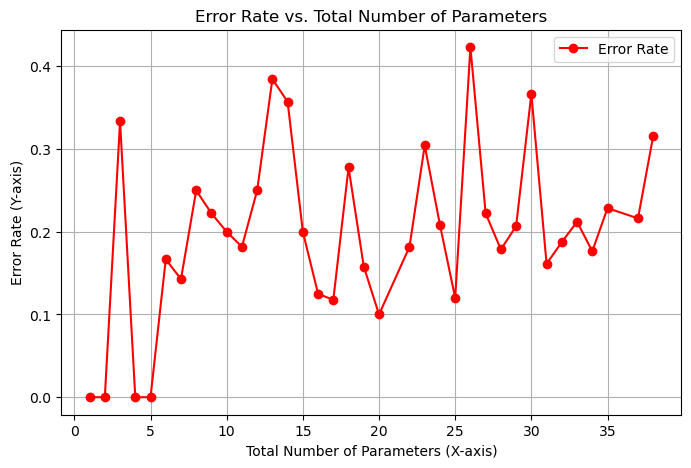

In [18]:

import numpy as np

# Compute error rate (errors/params)
error_rate = {key: value / key for key, value in acc_dict.items()}

# Extract keys (total params) and values (error rates)
keys = list(error_rate.keys())
values = list(error_rate.values())

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the error rates
plt.plot(keys, values, marker='o', linestyle='-', color='r', label='Error Rate')

# Label the axes
plt.xlabel('Total Number of Parameters (X-axis)')
plt.ylabel('Error Rate (Y-axis)')

# Add a title to the plot
plt.title('Error Rate vs. Total Number of Parameters')

# Optionally, add gridlines for better visibility
plt.grid(True)

# Show the plot
plt.legend()
plt.show()
